<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Prodvinutaya_optimizaciya/DZ_Kondratev_MDS_36_HW_7_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [146]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [147]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

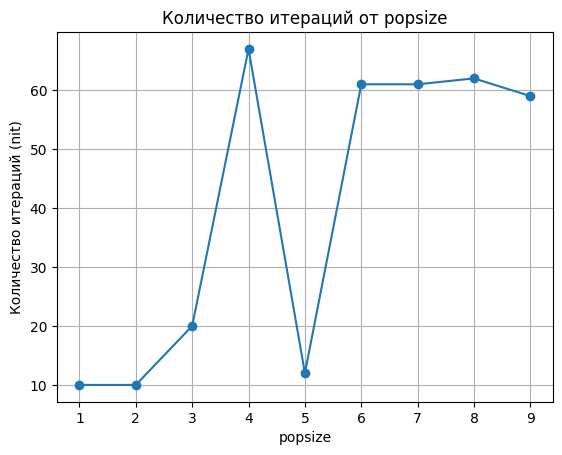

Наименьшее количество итераций:  10
Лучшее значение popsize:  1

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 59
    nfev: 1143


In [148]:
# Определим для начала оптимальное значения параметра popsize
strategy = 'best1bin'  # значение стратегии
popsize_values = range(1, 10, 1)  # Значения параметра popsize
mutation = 0.5  # мутация
nit_values = []  # Значения количества итераций

for popsize in popsize_values:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=0.5, seed=42)
    nit_values.append(result.nit)

# Построение графика
plt.plot(popsize_values, nit_values, marker='o')
plt.xlabel('popsize')
plt.ylabel('Количество итераций (nit)')
plt.title('Количество итераций от popsize')
plt.grid(True)
plt.show()

# Вывод наименьшего количества итераций и значения popsize
min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_popsize = popsize_values[min_index]

print("Наименьшее количество итераций: ", min_nit)
print("Лучшее значение popsize: ", best_popsize)
print()
print(result)

На промежуточных результатах можно сделать следующие выводы:

1. При изменении параметра `popsize` значение количества итераций (`nit`) также меняется. График показывает, что при наименьшем значении `popsize=1`, количество итераций равно 10. Более высокие значения `popsize` приводят к увеличению количества итераций.

2. По графику видно, что увеличение значения `popsize` более 3 не оказывает значительного влияния на снижение количества итераций.

3. Минимальное количество итераций достигается при `popsize=1` и составляет 10 итераций.

4. Параметр `strategy` и `мутация` могут оказывать влияние на оптимальные значения количества итераций, но для данного эксперимента они были зафиксированы.

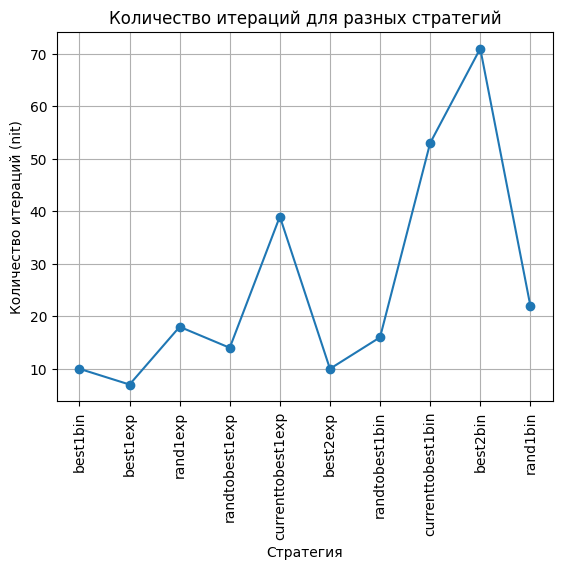

Наименьшее количество итераций: 7

Соответствующая стратегия: best1exp

 message: Optimization terminated successfully.
 success: True
     fun: 0.6979929865745125
       x: [-1.193e-01 -2.536e-02]
     nit: 22
    nfev: 370


In [149]:
# Теперь с оптимальной popsize = 1 определим лучшую стратегию (rand2bin и rand2exp не используем, так как они требуют бельшего значения popsize = 1)
popsize = 1
mutation = 0.5
nit_values = []
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand1bin']

for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=mutation, seed=42)
    nit_values.append(result.nit)

# Построение графика
plt.plot(range(len(strategies)), nit_values, marker='o')
plt.xticks(range(len(strategies)), strategies, rotation=90)
plt.xlabel('Стратегия')
plt.ylabel('Количество итераций (nit)')
plt.title('Количество итераций для разных стратегий')
plt.grid(True)
plt.show()

min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_strategy = strategies[min_index]

print(f"Наименьшее количество итераций: {min_nit}")
print(f"\nСоответствующая стратегия: {best_strategy}")
print()
print(result)

На промежуточных результатах можно сделать следующие выводы:

1. Из графика видно, что стратегия `best1exp` показывает наименьшее количество итераций (`nit=7`) для функции `ackley` при оптимальном значении `popsize=1` и мутации 0.5.

2. Стратегии `rand2bin` и `rand2exp` не использовались из-за требования большего значения `popsize`, поэтому они не были проанализированы.

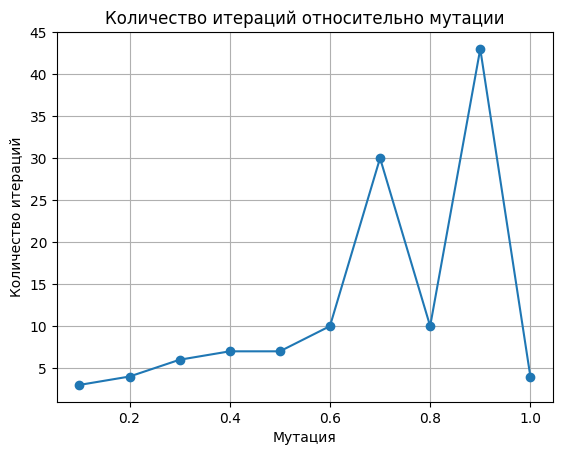

Наименьшее количество итераций:  3
Лучшее значение mutation:  0.1

 message: Optimization terminated successfully.
 success: True
     fun: 3.574451877257783
       x: [-9.685e-01  9.685e-01]
     nit: 4
    nfev: 52
     jac: [ 1.421e-06 -2.842e-06]


In [150]:
# Теперь примем popsize = 1 а strategy = 'best1exp' и определим лучшее значение mutation
popsize = 1
strategy = 'best1exp'
mutation_values = np.linspace(0.1, 1, 10)
nit_values = []

for mutation in mutation_values:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=mutation, seed=42)
    nit_values.append(result.nit)

# Plot
plt.plot(mutation_values, nit_values, marker='o')
plt.xlabel('Мутация')
plt.ylabel('Количество итераций')
plt.title('Количество итераций относительно мутации')
plt.grid(True)
plt.show()

# Find minimum number of iterations and best mutation value
min_nit = min(nit_values)
best_mutation = mutation_values[nit_values.index(min_nit)]

print("Наименьшее количество итераций: ", min_nit)
print("Лучшее значение mutation: ", best_mutation)
print()
print(result)


Из графика видно, что при значении мутации равном 0.1 достигается наименьшее количество итераций (`nit=3`) для функции `ackley` при использовании стратегии `best1exp` и `popsize=1`.

In [151]:
# Выводим результаты до опримизации параметров strategy='best1exp', popsize=1, mutation=0.1
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

In [152]:
# Выводим результаты с оптимальными параметрами strategy='best1exp', popsize=1, mutation=0.1
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=1, mutation=0.1, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 5.381864187490191
       x: [-9.824e-01 -1.965e+00]
     nit: 3
    nfev: 53
     jac: [ 3.553e-07  0.000e+00]

Оптимизация параметров `strategy`, `popsize` и `mutation` в алгоритме дифференциальной эволюции позволяет улучшить результаты оптимизации функции `ackley` следующим образом:

Выбор оптимальной стратегии влияет на то, как особи в популяции будут взаимодействовать и обмениваться информацией. Различные стратегии могут быть более эффективными для разных типов задач. В данном случае, стратегия `best1exp` показала наилучшие результаты для функции `ackley`.

При использовании функции ackley были получены наилучшие результаты при значениях `popsize=1` и `mutation=0.1`. В данном случае, увеличение размера популяции не привело к улучшению результатов, а значение мутации в 0.1 оказалось достаточным для создания достаточно разнообразных генотипов в популяции.

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [153]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0, method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

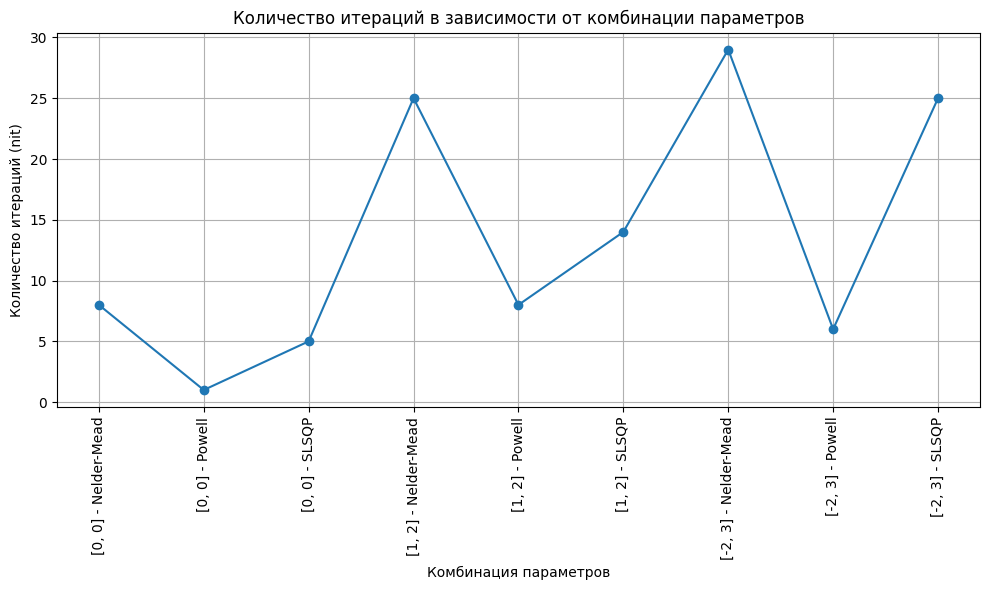

Наименьшее количество итераций:  1

Лучшая комбинация параметров:
Значение x0: [0, 0]
Метод: Powell


In [154]:
# Найдем оптимальные параметры путем их комбинации
np.random.seed(42)
x0_values = [[0, 0], [1, 2], [-2, 3]]
method_values = ['Nelder-Mead', 'Powell',  'SLSQP']
nit_values = []

for x0 in x0_values:
    for method in method_values:
        result = minimize(ackley, x0, method=method)
        nit_values.append(result.nit)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(nit_values))
ax.plot(x, nit_values, marker='o')
ax.set_xlabel('Комбинация параметров')
ax.set_ylabel('Количество итераций (nit)')
ax.set_title('Количество итераций в зависимости от комбинации параметров')
ax.set_xticks(x)
ax.set_xticklabels([f'{x0} - {method}' for x0 in x0_values for method in method_values], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Вывод наименьшего количества итераций и соответствующей комбинации параметров
min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_comb = [x0_values[min_index // len(method_values)], method_values[min_index % len(method_values)]]

print("Наименьшее количество итераций: ", min_nit)
print()
print("Лучшая комбинация параметров:")
print("Значение x0:", best_comb[0])
print("Метод:", best_comb[1])


Код выполняет оптимизацию функции Акли с различными значениями исходных точек и методами оптимизации, чтобы найти наилучшую комбинацию параметров, которая позволяет достичь минимального количества итераций. Он также визуализирует результаты в виде графика и выводит наименьшее количество итераций и соответствующую комбинацию параметров.

In [155]:
# Посмотрим на сводные результаты
x0 = [0, 0]

result_m1 = minimize(ackley, x0, method='Nelder-Mead')
result_m2 = minimize(ackley, x0, method='Powell')
result_m3 = minimize(ackley, x0, method='SLSQP')

print("Сводные результаты:")
print()
print(f"Метод 'Nelder-Mead':")
print(f"  Вызов функций: {result_m1.nfev}")
print(f"  Количество итераций: {result_m1.nit}")
print(f"  Значение функции: {result_m1.fun}")
print()
print(f"Метод 'Powell':")
print(f"  Вызов функций: {result_m2.nfev}")
print(f"  Количество итераций: {result_m2.nit}")
print(f"  Значение функции: {result_m2.fun}")
print()
print(f"Метод 'SLSQP':")
print(f"  Вызов функций: {result_m3.nfev}")
print(f"  Количество итераций: {result_m3.nit}")
print(f"  Значение функции: {result_m3.fun}")

Сводные результаты:

Метод 'Nelder-Mead':
  Вызов функций: 17
  Количество итераций: 8
  Значение функции: 4.440892098500626e-16

Метод 'Powell':
  Вызов функций: 61
  Количество итераций: 1
  Значение функции: 4.440892098500626e-16

Метод 'SLSQP':
  Вызов функций: 30
  Количество итераций: 5
  Значение функции: 3.605866716327455e-10


Исходя из этих данных, можно сделать вывод, что метод `Powell` является наиболее эффективным и позволяет достичь лучших результатов с наименьшим количеством итераций, хотя и требует немного больше вызовов функций.

Если задача требует нахождения точного минимума с минимальным количеством итераций, то Метод `Powell` может быть предпочтительным. Если вам необходимо сократить количество вызовов функции, то Метод `Nelder-Mead` может быть лучшим вариантом. Метод `SLSQ`P также является вариантом, но достигнутая точность может быть не наилучшей.